# Задачи
### 1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

### 2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

### 3. Сколько транзакций завершились ошибкой?

### 4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

### 5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

### 7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.


In [2]:
import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [3]:
transaction_data = pd.read_csv('~/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv')
transaction_data.date = pd.to_datetime(transaction_data.date)
transaction_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


### 2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
### 3. Сколько транзакций завершились ошибкой?


In [4]:
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

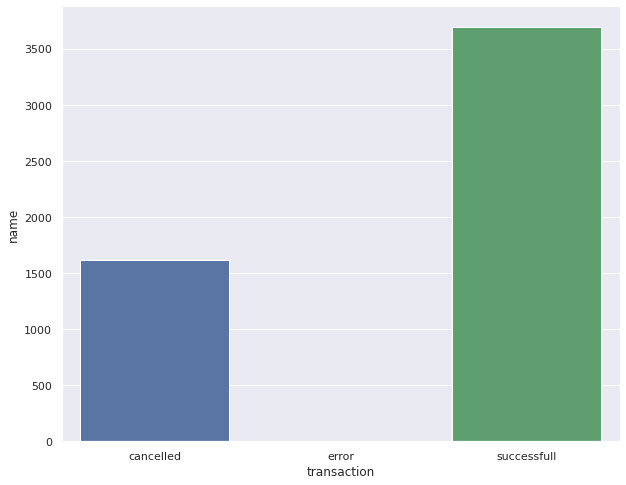

In [5]:
types_of_transactions = transaction_data.groupby('transaction', as_index=False).agg({'name': 'count'})
sns.set(rc={"figure.figsize": ( 10 , 8 )})
sns.barplot(data = types_of_transactions, y='name', x='transaction')

### 4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.


transaction    61.0
Name: 0.25, dtype: float64

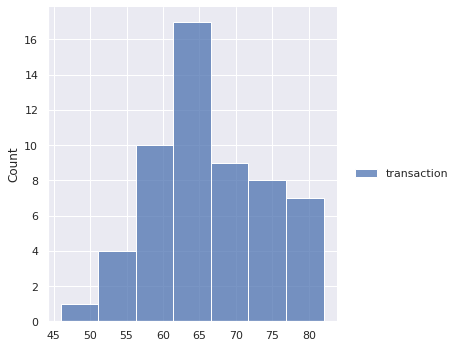

In [6]:
user_successful_data = transaction_data.query('transaction == "successfull"').groupby('name', as_index=False).agg({'transaction': 'count'})
sns.displot(user_successful_data)
user_successful_data.transaction.max()
user_successful_data.quantile(q=0.25)

### 5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.


In [25]:
df = pd.read_csv('~/transaction_data_updated.csv')
df.date = pd.to_datetime(df.date)
# df.date = df.date.dt.minute
# df = df.drop('date', axis=1)
user_vs_minute_pivot = df.groupby(['name', 'minute'], as_index=False).agg({'transaction': 'count'}) \
    .pivot(index='minute', columns='name', values='transaction') \
    .fillna(0).reset_index()
user_vs_minute_pivot.head()

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


### 6. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.


In [33]:
# sns.set(rc={"figure.figsize": ( 15 , 8 )})
# sns.barplot(data=)

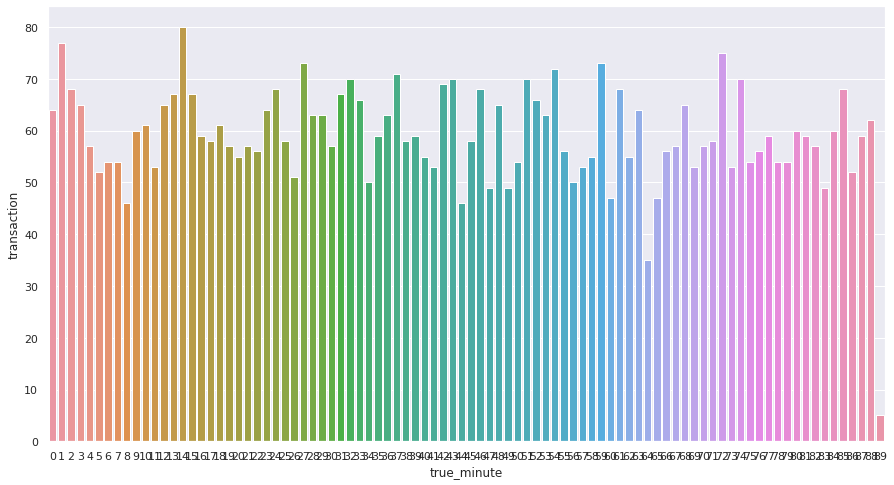

In [36]:
df['true_minute'] = df.date.dt.minute + (df.date.dt.hour * 60)
sns.set(rc={"figure.figsize": ( 15 , 8 )})
sns.barplot(data=df.groupby('true_minute', as_index=False).agg({'transaction': 'count'}), x='true_minute', y='transaction')